In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


In [ ]:
#1. Read the dataset

In [6]:
from google.colab import files 
  
uploaded = files.upload()
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['bank.csv'])) 

#df= pd.read_csv('bank.csv')

Saving bank.csv to bank.csv


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#2. Drop the columns which are unique for all users like IDs (5 points)

In [10]:
#RowNumber and CustomerIds are Unique to all employees.
df = df.drop(["RowNumber","CustomerId"],axis=1)

In [11]:
#Surname are Unique to employees and doesn't have any value
df = df.drop(["Surname"],axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#3. Distinguish the feature and target set (5 points)

In [13]:
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


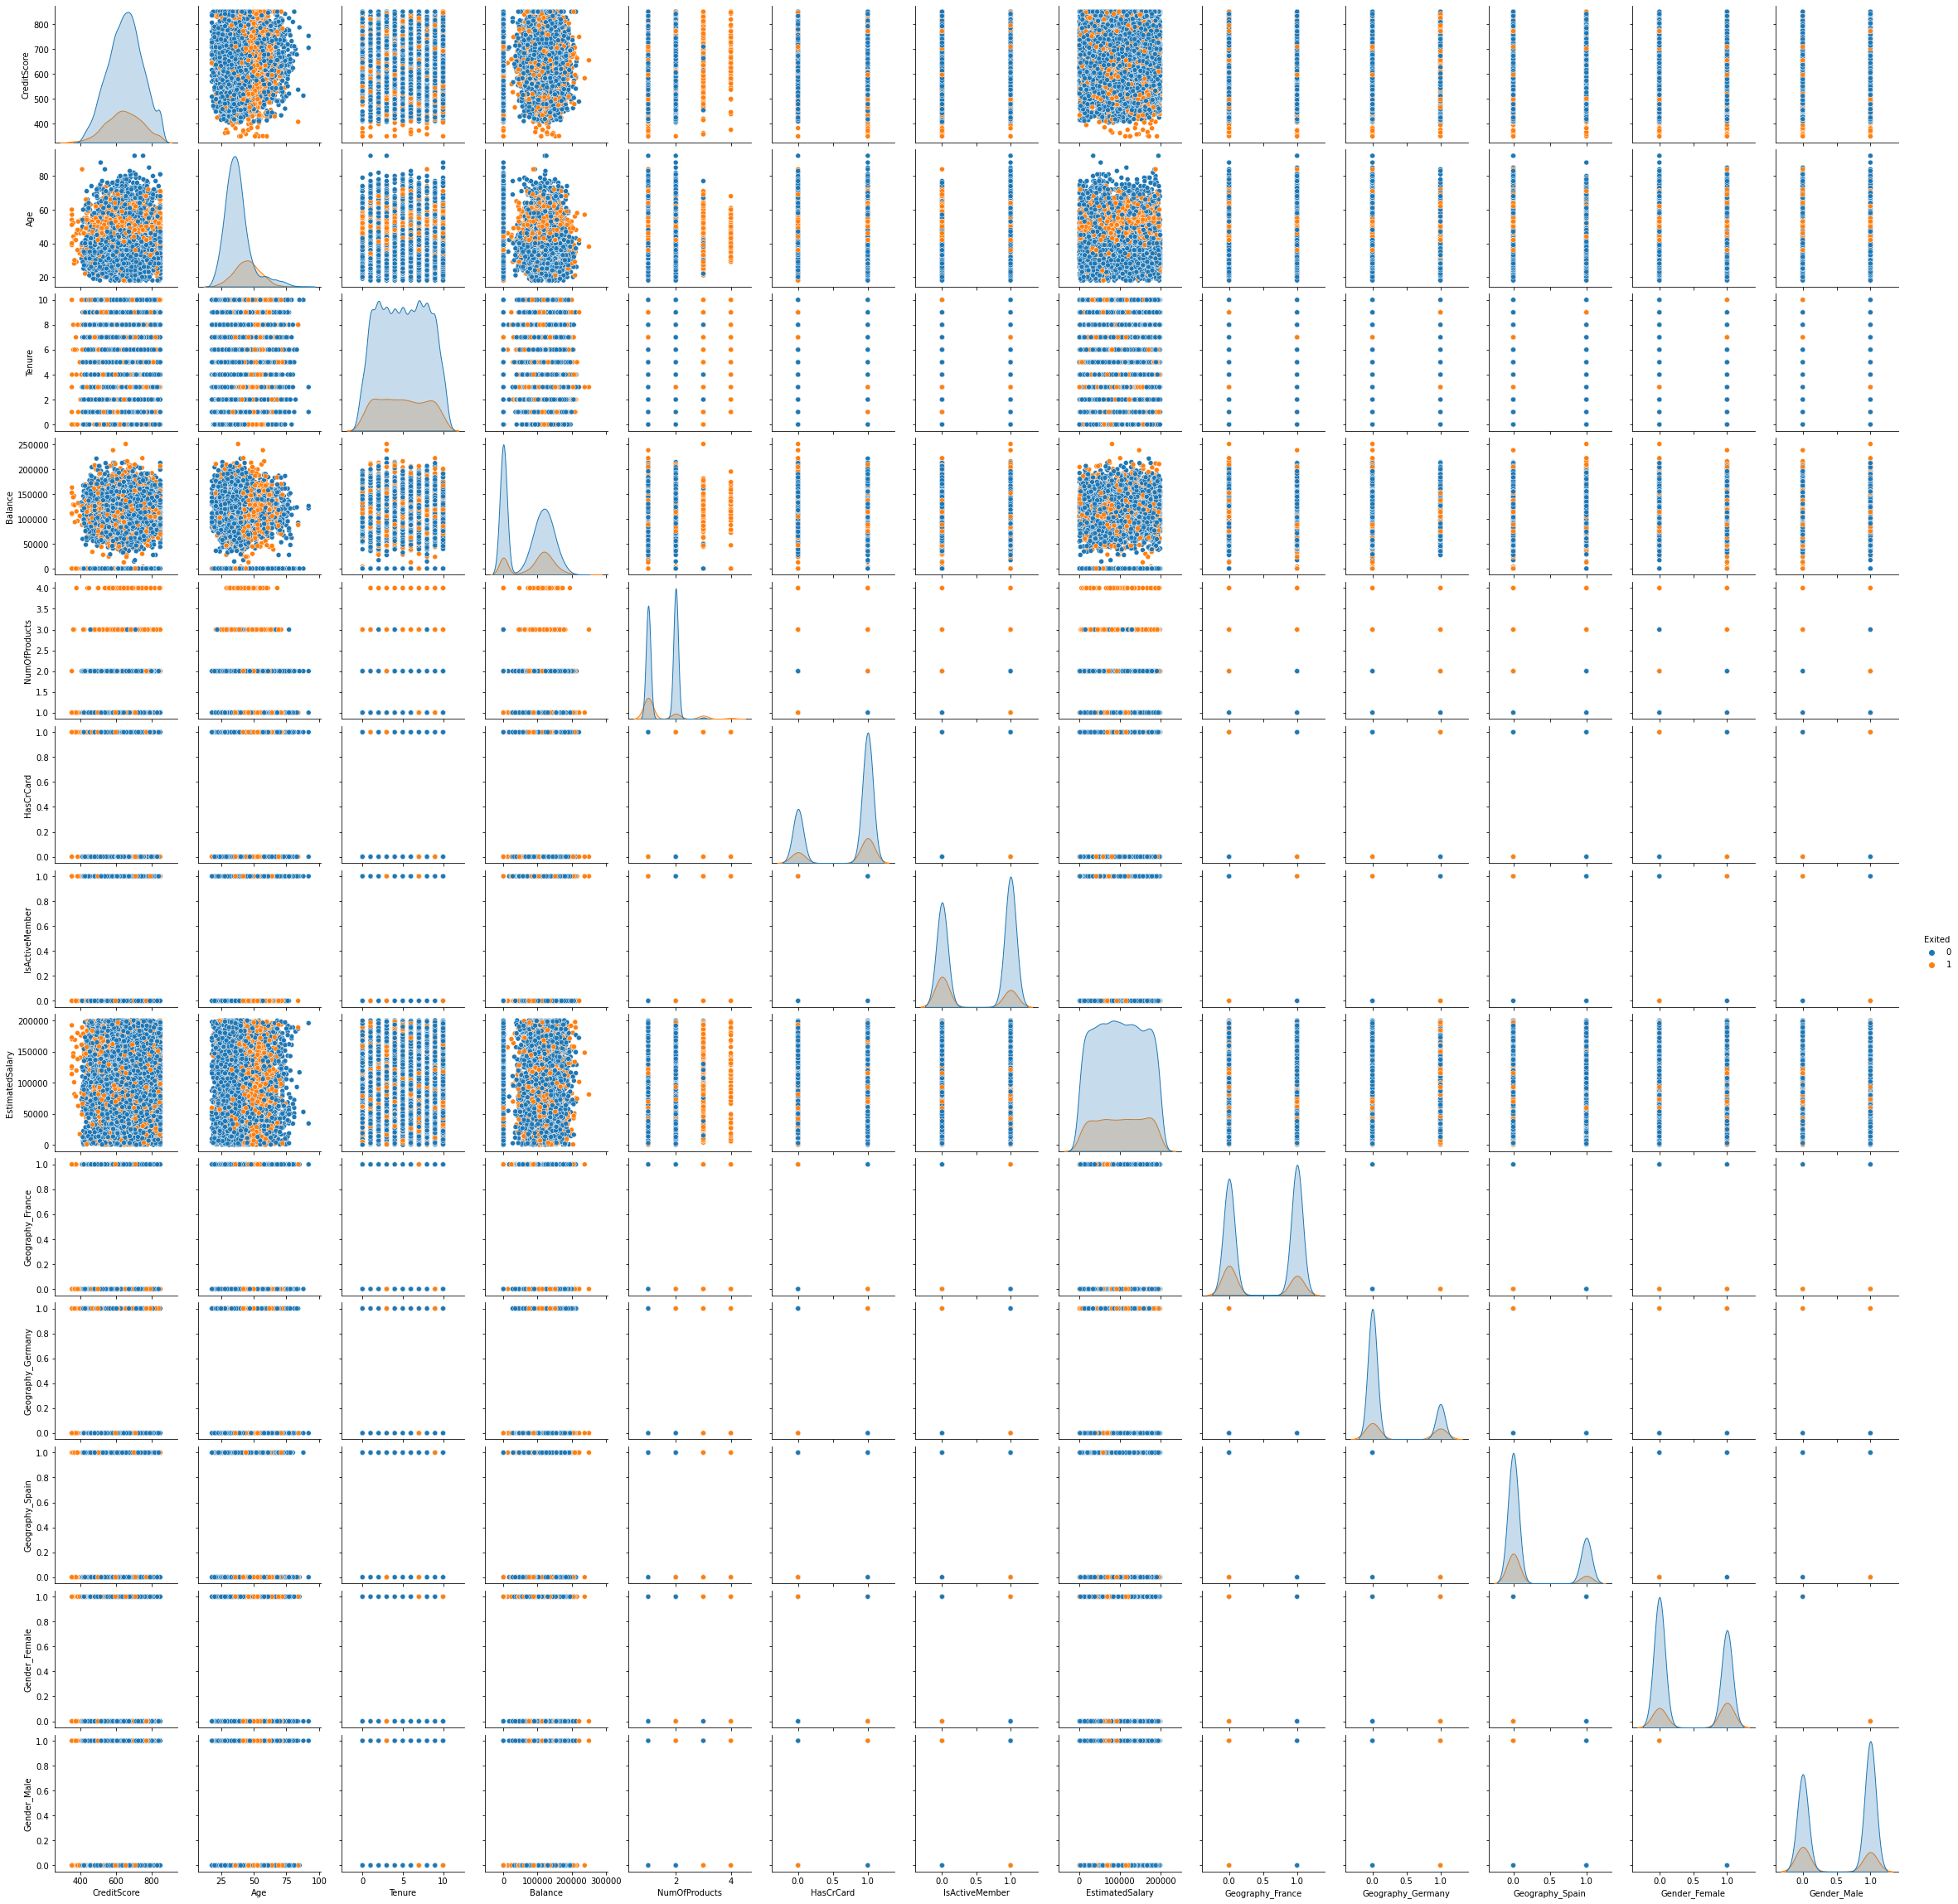

In [ ]:
sns.pairplot(df,hue='Exited');

In [15]:
## Define X and Y variables
X = df.drop(['Exited'],axis=1)     # Predictor feature columns (13 X m)
Y = df['Exited']   # Predicted target (1=True, 0=False) (1 X m)

In [16]:
X.shape

(10000, 13)

In [ ]:
#4. Divide the data set into training and test sets (5 points)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


In [ ]:
#5. Normalize the train and test data (10 points)

In [18]:
#Normalize the data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)
X_train_norm

array([[3.72879494e-03, 1.72189575e-04, 1.78127147e-05, ...,
        0.00000000e+00, 0.00000000e+00, 5.93757156e-06],
       [5.51660345e-03, 2.55561501e-04, 3.52498623e-05, ...,
        0.00000000e+00, 8.81246557e-06, 0.00000000e+00],
       [4.43992338e-03, 3.40974508e-04, 4.35286605e-05, ...,
        0.00000000e+00, 7.25477676e-06, 0.00000000e+00],
       ...,
       [7.30195446e-03, 4.88970164e-04, 9.77940329e-05, ...,
        0.00000000e+00, 1.08660037e-05, 0.00000000e+00],
       [6.55325611e-03, 3.85485653e-04, 7.90739802e-05, ...,
        0.00000000e+00, 9.88424752e-06, 0.00000000e+00],
       [7.22500037e-03, 3.97706442e-04, 5.68152060e-05, ...,
        0.00000000e+00, 0.00000000e+00, 9.46920101e-06]])

In [19]:
#Scale the data
scaler_mms = preprocessing.MinMaxScaler()
#fitting the transform on test and train separately
X_train_mms = scaler_mms.fit_transform(X_train)
X_test_mms = scaler_mms.fit_transform(X_test)
X_train_mms

array([[0.556     , 0.14864865, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.552     , 0.14864865, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.524     , 0.39189189, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.644     , 0.36486486, 0.9       , ..., 0.        , 1.        ,
        0.        ],
       [0.626     , 0.28378378, 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.826     , 0.32432432, 0.6       , ..., 0.        , 0.        ,
        1.        ]])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
X_train_s

array([[-0.23082038, -0.94449979, -0.70174202, ..., -0.57273139,
        -0.91509065,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.57273139,
         1.09278791, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -0.57273139,
         1.09278791, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.57273139,
         1.09278791, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ..., -0.57273139,
        -0.91509065,  0.91509065]])

In [ ]:
#6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)

In [21]:
nn_model= []
trainscore = []
testscore = []
loss = []

In [22]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))

# second hidden layer
#model.add(Dense(10, activation='relu', kernel_initializer='normal'))


# Add an output layer with one neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))


In [23]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
#Fit the model
#model.fit(X_train_norm, y_train, batch_size = 250, epochs = 50, verbose = 1)
model.fit(X_train_norm, y_train, epochs=50, batch_size=50, verbose=0) 

In [25]:
#Evaluate the model - Training Accuracy
model.evaluate(X_train_norm, y_train.values)

250/250 [==============================] - 0s 842us/step - loss: 0.4981 - accuracy: 0.7972


[0.49810755252838135, 0.797249972820282]

In [26]:
#Evaluate the model - Testing Accuracy
model.evaluate(X_test_norm, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7925


[0.5048912167549133, 0.7925000190734863]

In [27]:
nn_model.append('Base model - Normalized Data with 1 hidden layers')
trainscore.append(model.evaluate(X_train_norm, y_train.values))
testscore.append(model.evaluate(X_test_norm, y_test.values))


63/63 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7925


In [28]:
# Trying to improve te model by adding Second hidden layer

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Initialize the constructor
model1 = Sequential()

# Add an first hidden layer 
model1.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))

# second hidden layer
model1.add(Dense(10, activation='sigmoid', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model1.add(Dense(1, activation='sigmoid'))


In [29]:
#Compile the model
#optimizer = tf.keras.optimizers.Adam(0.01)
#optimizer = 'sgd'
optimizer = 'rmsprop'

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [30]:
#Fit the model
model1.fit(X_train_norm, y_train, batch_size = 700, epochs = 50, verbose = 1)

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7972
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7972
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7972
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7972
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7972
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7972
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7972
Epoch 8/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7972
Epoch 9/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7972
Epoch 10/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7972
Epoch 11/50
12/12 [

In [31]:
#Evaluate the model - Training Accuracy
Train_results_2layers_norm = model1.evaluate(X_train_norm, y_train.values)

250/250 [==============================] - 0s 836us/step - loss: 0.5012 - accuracy: 0.7972


In [32]:
#Evaluate the model - Testing Accuracy
Test_results_2layers_norm = model1.evaluate(X_test_norm, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7925


In [33]:
print("Accuracy of Training data for Normalized Data with 2 hidden layers :", Train_results_2layers_norm[1])
print("Accuracy of Testing data for Normalized Data with 2 hidden layers :", Test_results_2layers_norm[1])

Accuracy of Training data for Normalized Data with 2 hidden layers : 0.797249972820282
Accuracy of Testing data for Normalized Data with 2 hidden layers : 0.7925000190734863


In [34]:
nn_model.append('Normalized Data with 2 hidden layers - Adam')
trainscore.append(model1.evaluate(X_train_norm, y_train.values))
testscore.append(model1.evaluate(X_test_norm, y_test.values))

63/63 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7925


In [ ]:
#Try different Optimizer

In [57]:
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [58]:
model1.fit(X_train_norm, y_train, epochs=50, batch_size=256, verbose=1) 

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7972
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7972
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7972
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7972
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7972
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7972
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7972
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.7972
Epoch 11/50
32/32 [

In [35]:
# Try to fit the model with Standardized data (MinMaxScaler) instead of normallized data

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Initialize the constructor
model2 = Sequential()

# Add an first hidden layer 
model2.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model2.add(Dense(1, activation='sigmoid'))


In [36]:
#Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model2.fit(X_train_mms, y_train, epochs=50, batch_size=256, verbose=1) 

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7972
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7972
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.7972
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7972
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7972
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7972
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7972
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7972
Epoch 11/50
32/32 [

In [38]:
#Evaluate the model - Training Accuracy
model2.evaluate(X_train_mms, y_train.values)

250/250 [==============================] - 0s 796us/step - loss: 0.4379 - accuracy: 0.8099


[0.4378890097141266, 0.8098750114440918]

In [39]:
#Evaluate the model - Testing Accuracy
model2.evaluate(X_test_mms, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8100


[0.43531906604766846, 0.8100000023841858]

In [40]:
nn_model.append('Standardlized Data (Minmaxscaler) with 1 hidden layers - Adam')
trainscore.append(model2.evaluate(X_train_mms, y_train.values))
testscore.append(model2.evaluate(X_test_mms, y_test.values))

63/63 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8100


In [41]:
# Try to fit the model with Standardized data instead of normallized data

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# Initialize the constructor
model3 = Sequential()

# Add an first hidden layer 
model3.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))


# Add an output layer with one neuron and no activation specified
model3.add(Dense(1, activation='sigmoid'))


In [42]:
#Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
model3.fit(X_train_s, y_train, epochs=50, batch_size=256, verbose=1) 

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.7972
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7971
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.7976
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7990
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8006
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8025
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8043
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8067
Epoch 11/50
32/32 [

In [43]:
#Evaluate the model - Training Accuracy
model3.evaluate(X_train_s, y_train.values)

250/250 [==============================] - 0s 868us/step - loss: 0.4271 - accuracy: 0.8126


[0.4270508885383606, 0.812624990940094]

In [44]:
#Evaluate the model - Testing Accuracy
model3.evaluate(X_test_s, y_test.values)

63/63 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8100


[0.422607958316803, 0.8100000023841858]

In [45]:
nn_model.append('Standardlized Data (Standard scaler) with 1 hidden layers - Adam')
trainscore.append(model3.evaluate(X_train_s, y_train.values))
testscore.append(model3.evaluate(X_test_s, y_test.values))

63/63 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8100


In [46]:
# Try to fit the model with Standardized data with 2 hidden layers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model4 = Sequential()

# Add an first hidden layer 
model4.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))

# second hidden layer
model4.add(Dense(10, activation='sigmoid', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model4.add(Dense(1, activation='sigmoid'))


In [47]:
#Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
model4.fit(X_train_s, y_train, epochs=50, batch_size=256, verbose=1) 

Epoch 1/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7972
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7972
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7972
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7972
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7972
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7972
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4628 - accuracy: 0.7972
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7972
Epoch 11/50
32/32 [

In [48]:
#Evaluate the model - Training Accuracy
model4.evaluate(X_train_s, y_train.values)

250/250 [==============================] - 0s 935us/step - loss: 0.4185 - accuracy: 0.8195


[0.41852763295173645, 0.8195000290870667]

In [49]:
#Evaluate the model - Testing Accuracy
model4.evaluate(X_test_s, y_test.values)

63/63 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8210


[0.4138112962245941, 0.8209999799728394]

In [50]:
nn_model.append('Standardlized Data (Standard scaler) with 2 hidden layers - Adam')
trainscore.append(model4.evaluate(X_train_s, y_train.values))
testscore.append(model4.evaluate(X_test_s, y_test.values))

63/63 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8210


In [51]:
# Try to fit the model with different Optimizer - sgd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model5 = Sequential()

# Add an first hidden layer 
model5.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))

# second hidden layer
model5.add(Dense(10, activation='sigmoid', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model5.add(Dense(1, activation='sigmoid'))

#Compile the model
model5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Fit the model
model5.fit(X_train_s, y_train, epochs=50, batch_size=256, verbose=1) 

#Evaluate the model - Training Accuracy
model5.evaluate(X_train_s, y_train.values)

#Evaluate the model - Testing Accuracy
model5.evaluate(X_test_s, y_test.values)

nn_model.append('Standardlized Data (Standard scaler) with 2 hidden layers - sgd')
trainscore.append(model5.evaluate(X_train_s, y_train.values))
testscore.append(model5.evaluate(X_test_s, y_test.values))

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7462 - accuracy: 0.2878
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7972
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7972
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7972
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7972
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5087 - accuracy: 0.7972
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7972
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7972
Epoch 11/50
32/32 [

In [52]:
# Try to fit the model with different Optimizer - rmsprop

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model6 = Sequential()

# Add an first hidden layer 
model6.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))

# second hidden layer
model6.add(Dense(10, activation='sigmoid', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model6.add(Dense(1, activation='sigmoid'))

#Compile the model
model6.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#Fit the model
model6.fit(X_train_s, y_train, epochs=50, batch_size=256, verbose=1) 

#Evaluate the model - Training Accuracy
model6.evaluate(X_train_s, y_train.values)

#Evaluate the model - Testing Accuracy
model6.evaluate(X_test_s, y_test.values)

nn_model.append('Standardlized Data (Standard scaler) with 2 hidden layers - rmsprop')
trainscore.append(model6.evaluate(X_train_s, y_train.values))
testscore.append(model6.evaluate(X_test_s, y_test.values))

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.3473
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.7972
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5304 - accuracy: 0.7972
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7972
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7972
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7972
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7972
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.7972
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7972
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7972
Epoch 11/50
32/32 [

In [59]:
#Try with Larger Epoch

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Initialize the constructor
model7 = Sequential()

# Add an first hidden layer 
model7.add(Dense(20, activation='sigmoid', kernel_initializer='normal'))

# second hidden layer
model7.add(Dense(10, activation='sigmoid', kernel_initializer='normal'))

# Add an output layer with one neuron and no activation specified
model7.add(Dense(1, activation='sigmoid'))

#Compile the model
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
model7.fit(X_train_s, y_train, epochs=500, batch_size=256, verbose=1) 

#Evaluate the model - Training Accuracy
model7.evaluate(X_train_s, y_train.values)

#Evaluate the model - Testing Accuracy
model7.evaluate(X_test_s, y_test.values)

nn_model.append('Standardlized Data (Standard scaler) with 2 hidden layers - Adam - 500 Epoch')
trainscore.append(model7.evaluate(X_train_s, y_train.values))
testscore.append(model7.evaluate(X_test_s, y_test.values))

Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 0.7271 - accuracy: 0.3516
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 0.6171 - accuracy: 0.7972
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.7972
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.7972
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4991 - accuracy: 0.7972
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7972
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7972
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7972
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7972
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.7972
Epoch 11/

In [60]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = nn_model
results['Training Score'] = trainscore
results['Testing Score'] = testscore
results = results.set_index('Model')
results

,Training Score,Testing Score
Model,,
Base model - Normalized Data with 1 hidden layers,"[0.49810755252838135, 0.797249972820282]","[0.5048912167549133, 0.7925000190734863]"
Normalized Data with 2 hidden layers - Adam,"[0.5012179613113403, 0.797249972820282]","[0.5078777074813843, 0.7925000190734863]"
Standardlized Data (Minmaxscaler) with 1 hidden layers - Adam,"[0.4378890097141266, 0.8098750114440918]","[0.43531906604766846, 0.8100000023841858]"
Standardlized Data (Standard scaler) with 1 hidden layers - Adam,"[0.4270508885383606, 0.812624990940094]","[0.422607958316803, 0.8100000023841858]"
Standardlized Data (Standard scaler) with 2 hidden layers - Adam,"[0.41852763295173645, 0.8195000290870667]","[0.4138112962245941, 0.8209999799728394]"
Standardlized Data (Standard scaler) with 2 hidden layers - sgd,"[0.5034191608428955, 0.797249972820282]","[0.5098466873168945, 0.7925000190734863]"
Standardlized Data (Standard scaler) with 2 hidden layers - rmsprop,"[0.4239882528781891, 0.8143749833106995]","[0.4203418791294098, 0.8165000081062317]"
Standardlized Data (Standard scaler) with 2 hidden layers - Adam - 100 Epoch,"[0.40301111340522766, 0.8368750214576721]","[0.3980902135372162, 0.8345000147819519]"
Standardlized Data (Standard scaler) with 2 hidden layers - Adam - 200 Epoch,"[0.3888777792453766, 0.8445000052452087]","[0.38614243268966675, 0.843999981880188]"


In [ ]:
#Best model is Standardlized Data (Standard scaler) with 2 hidden layers - Adam Optimizer with 500 Epoch 
#with Training score of 0.8658750057220459(86.59%) and Testing score of 0.8715000152587891(87.15%)

In [ ]:
#7. Predict the results using 0.5 as a threshold (10 points)

In [61]:
preds_s = model7.predict(X_test_s)

In [62]:
(preds_s>0.5).astype(int)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
#8. Print the Accuracy score and confusion matrix (5 points)

In [64]:
print('Accuracy Model (2hidden layer - normalized - Adam - 500 Epoch): '+ str(model7.evaluate(X_test_s,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,(preds_s>0.5).astype(int))))
print('Precision_score: ' + str(precision_score(y_test.values, (preds_s>0.5).astype(int))))
print('F-score: ' + str(f1_score(y_test.values,(preds_s>0.5).astype(int))))
print('Confusion Matrix:')
confusion_matrix(y_test.values, (preds_s>0.5).astype(int))

63/63 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8715
Accuracy Model (2hidden layer - normalized - Adam - 500 Epoch): 0.8715000152587891
Recall_score: 0.4939759036144578
Precision_score: 0.8134920634920635
F-score: 0.6146926536731634
Confusion Matrix: 


array([[1538,   47],
       [ 210,  205]])